<a href="https://colab.research.google.com/github/gaurangsahu99/Bike-Sharing-Demand-Analysis/blob/main/REGRESSION_CAPSTONE_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Name** - BIKE SHARING DEMAND PREDICTION.

Project Type - Regression
Contribution - Individual by GAURANG SAHU

Project Summary


The Bike Sharing Demand Prediction project aims to predict the demand for bike rentals in a particular area, given certain conditions such as weather, time of day, and day of the week. The project utilizes historical bike rental data, including the number of rentals and various features such as temperature, humidity, and wind speed, to train a machine learning model. The model can then be used to make predictions about future bike rental demand.

The project begins with data exploration and cleaning to ensure that the data is accurate and usable. Then, the data is split into a training set and a test set, and the model is trained on the training set. The performance of the model is evaluated using the test set, and any necessary adjustments are made.

In the end, the model will be deployed and used to make predictions on new data, which can be used by bike rental companies to optimize their operations and make better business decisions.

giithub link



Problem Statement
"Given historical bike rental data, including the number of rentals and various features such as weather conditions, time of day, and day of the week, the goal of this project is to develop a machine learning model that can accurately predict future bike rental demand. This model will be used by bike rental companies to optimize their operations and make better business decisions."

In summary, the project aims to predict the bike rental demand by using historical data and various features, this model will be able to make predictions on future demand, in order to help bike rental companies to optimize their operations and make better business decisions.

let's begin

In [ ]:
import numpy as np                                                     #importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path="/content/drive/MyDrive/SeoulBikeData (1).csv"
df=pd.read_csv(path)
df.head()
df.describe()
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
median=df.median()
median

<ipython-input-4-039655f9d482>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median=df.median()


Rented Bike Count             504.50
Hour                           11.50
Temperature(°C)                13.70
Humidity(%)                    57.00
Wind speed (m/s)                1.50
Visibility (10m)             1698.00
Dew point temperature(°C)       5.10
Solar Radiation (MJ/m2)         0.01
Rainfall(mm)                    0.00
Snowfall (cm)                   0.00
dtype: float64

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df["month"]=df['Date'].dt.month

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '13-12-2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '14-12-2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '15-12-2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '16-12-2017' in DD/MM/YYYY format. Provide format or specify infer_datetime

In [ ]:
# duplicate
len(df[df.duplicated()])

0

In [ ]:
col=["Hour","month","Holiday"]
for i in col:
  df[i]=df[i].astype("category")

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   category      
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rented Bike Count', ylabel='Density'>

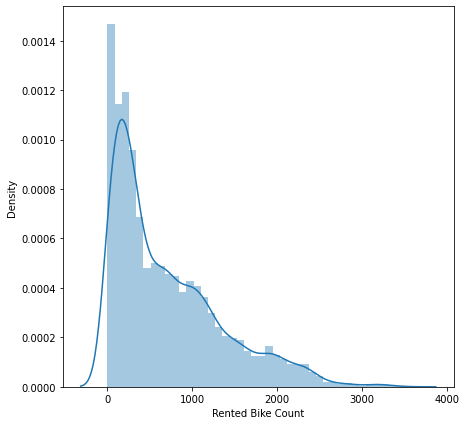

In [ ]:
#dependent variable "rented bike count"
plt.figure(figsize=(7,7))
sns.distplot(df["Rented Bike Count"])


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rented Bike Count', ylabel='Density'>

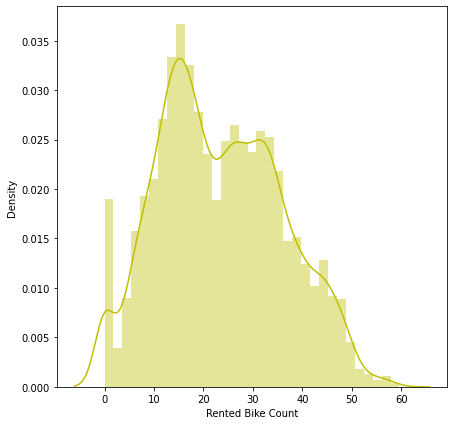

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(np.sqrt(df['Rented Bike Count']),color="y")

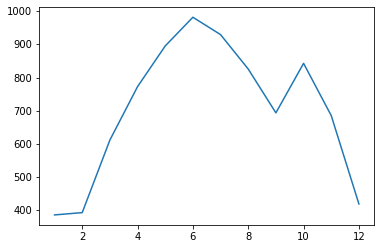

In [ ]:
plt_1=df.groupby(["month"])['Rented Bike Count'].mean()
plt.plot(plt_1)

<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>

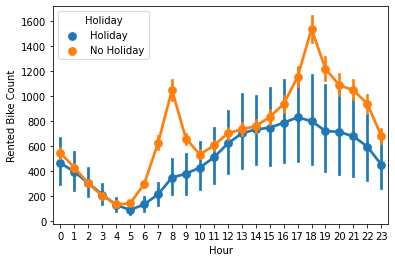

In [ ]:
sns.pointplot(data=df,x="Hour",y="Rented Bike Count",hue="Holiday")

<AxesSubplot:xlabel='Seasons'>

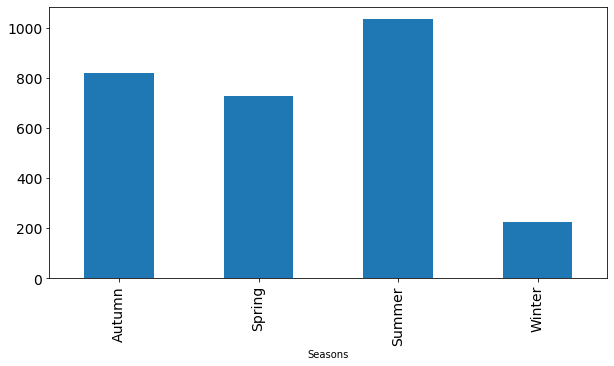

In [ ]:
plt_2=df.groupby(["Seasons"])['Rented Bike Count'].mean()
plt_2.plot.bar(figsize=(10,5),fontsize=14)

In [ ]:
numeric_features = df.describe().columns
numeric_features

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

Rented Bike Count


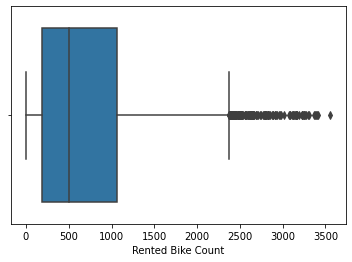

Temperature(°C)


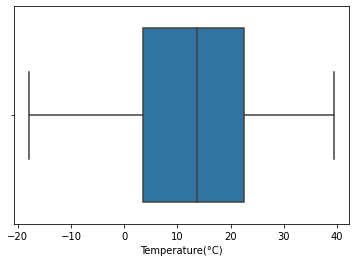

Humidity(%)


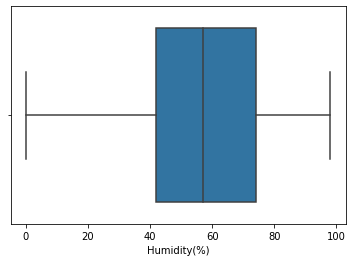

Wind speed (m/s)


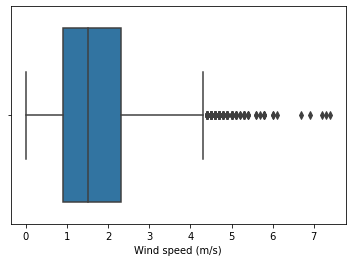

Visibility (10m)


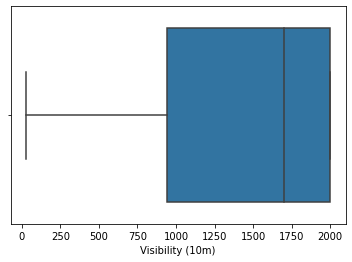

Dew point temperature(°C)


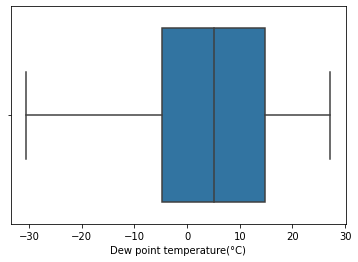

Solar Radiation (MJ/m2)


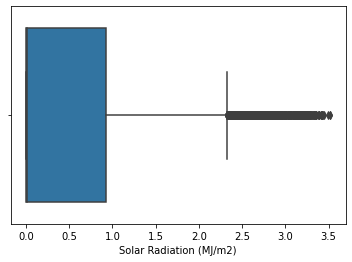

Rainfall(mm)


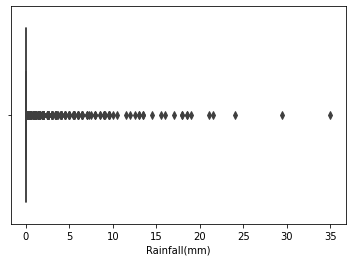

Snowfall (cm)


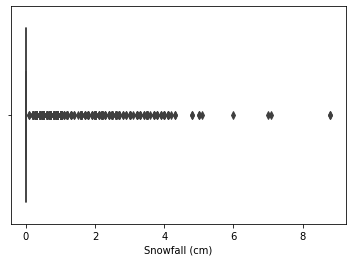

In [ ]:
for i in df.describe().columns:
  print(i)
  sns.boxplot(x=i,data=df)

  plt.gca()
  plt.show()

In [ ]:
q1, q3, median = df['Rented Bike Count'].quantile([0.25,0.75,0.5])
lower_limit = q1 - 1.5*(q3-q1)
upper_limit = q3 + 1.5*(q3-q1)
df['Rented Bike Count'] = np.where(df['Rented Bike Count'] > upper_limit, median,np.where(
                            df['Rented Bike Count'] < lower_limit,median,df['Rented Bike Count']))

# Removing outliers by Capping:
for col in ['Wind speed (m/s)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']:
  upper_limit = df[col].quantile(0.99)
  df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

Rented Bike Count


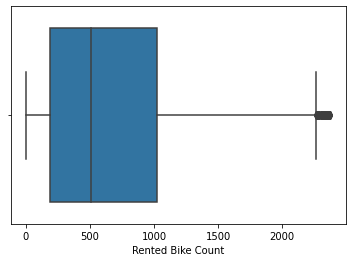

Temperature(°C)


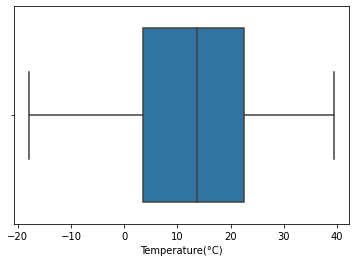

Humidity(%)


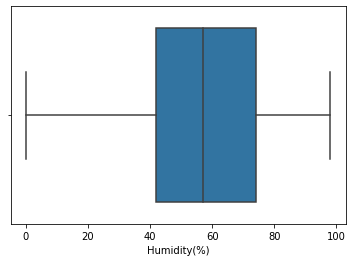

Wind speed (m/s)


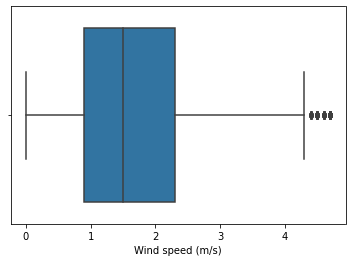

Visibility (10m)


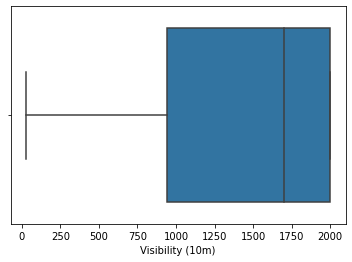

Dew point temperature(°C)


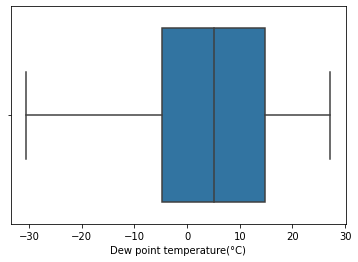

Solar Radiation (MJ/m2)


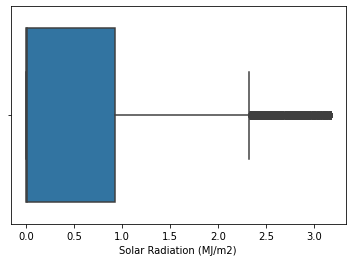

Rainfall(mm)


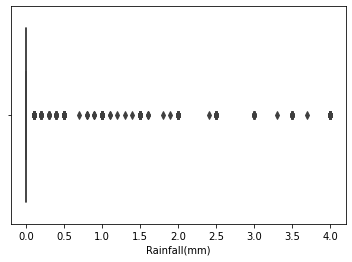

Snowfall (cm)


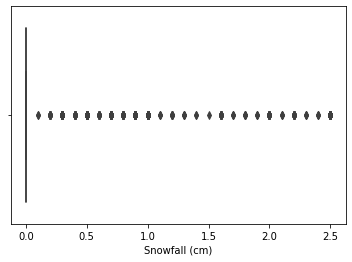

In [ ]:
for i in df.describe().columns:
  print(i)
  sns.boxplot(x=i,data=df)

  plt.gca()
  plt.show()

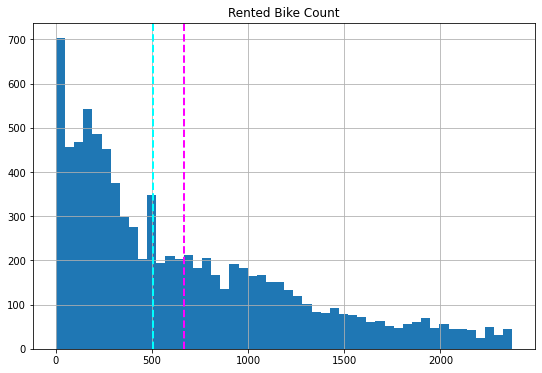

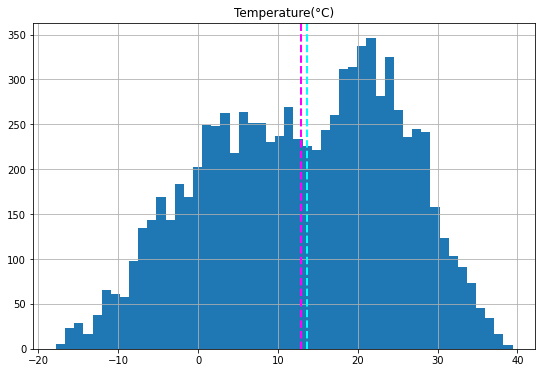

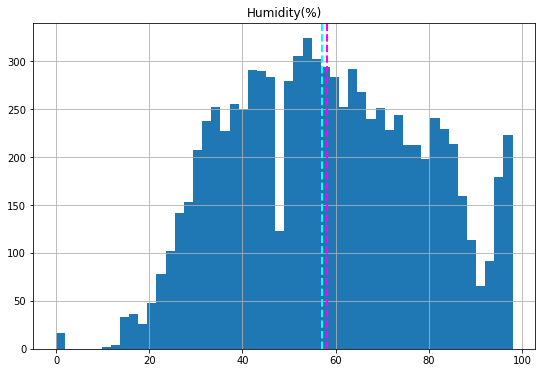

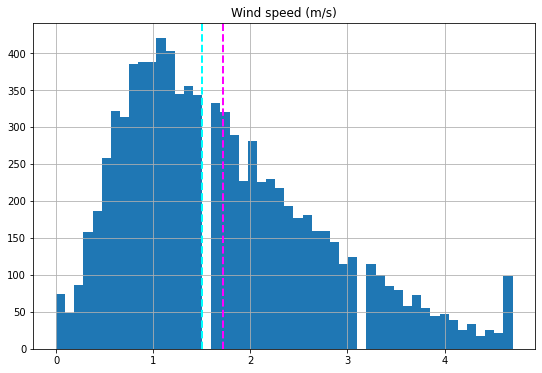

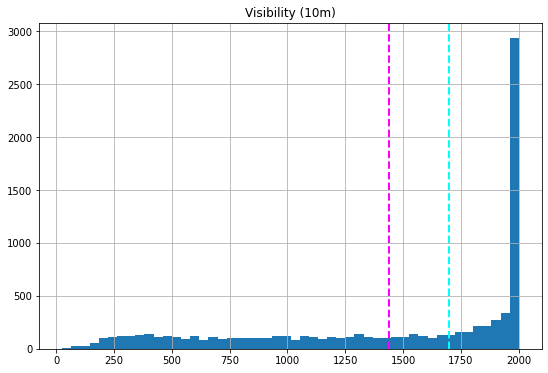

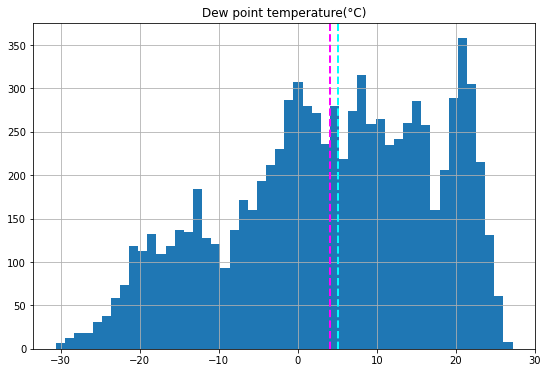

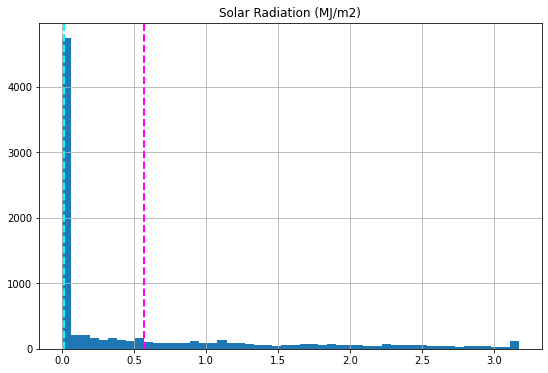

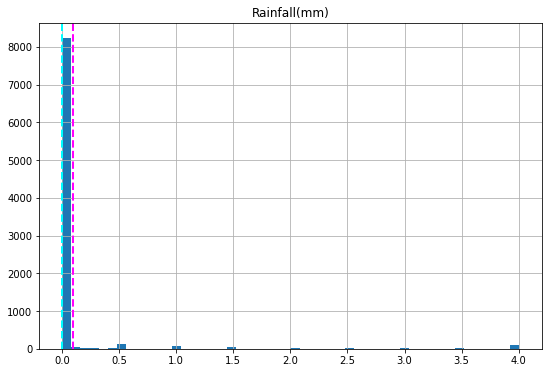

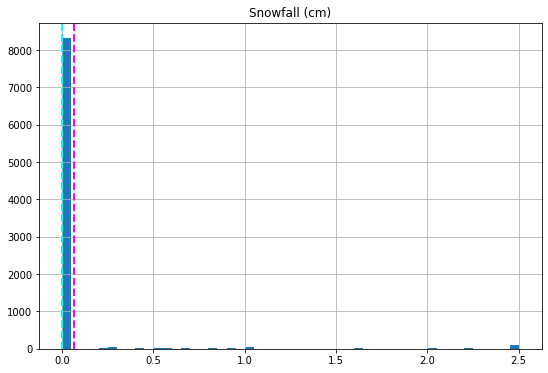

In [ ]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

Rented Bike Count


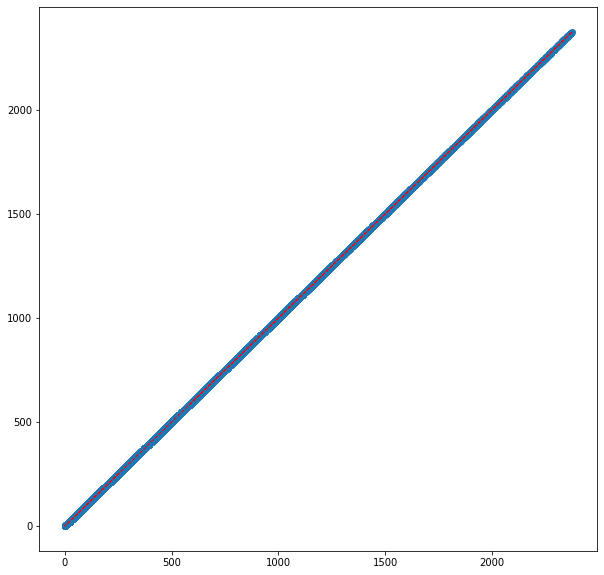

Temperature(°C)


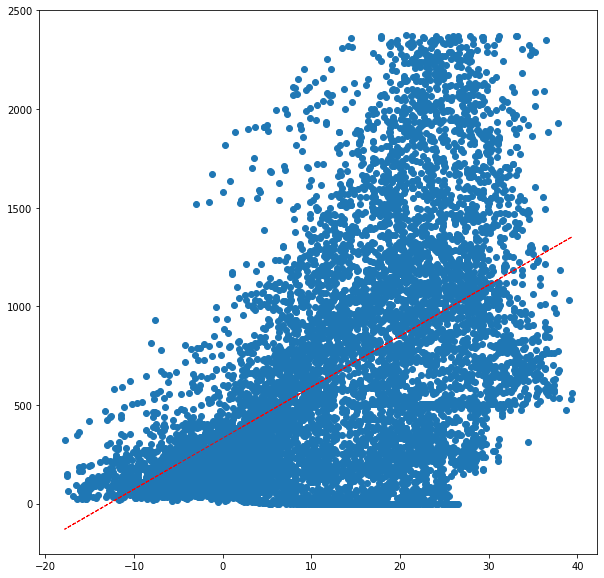

Humidity(%)


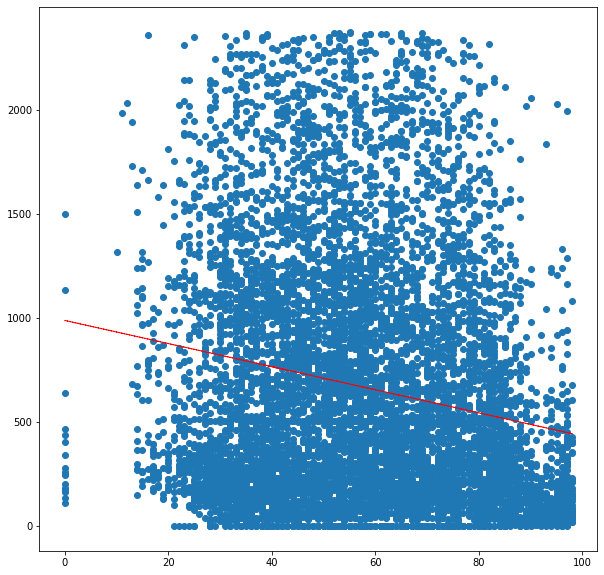

Wind speed (m/s)


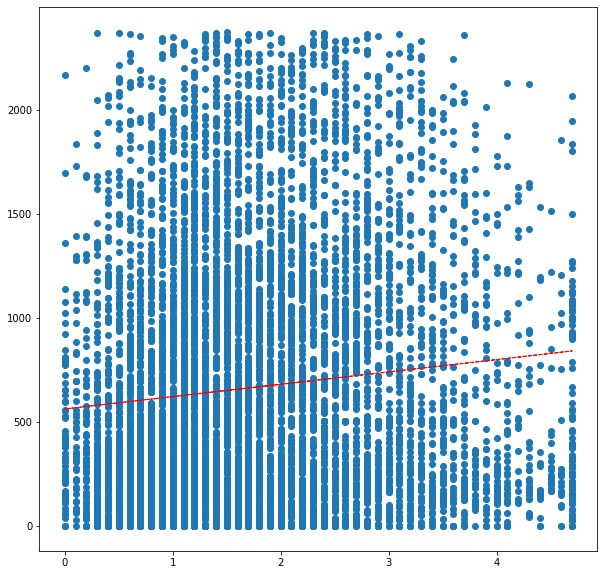

Visibility (10m)


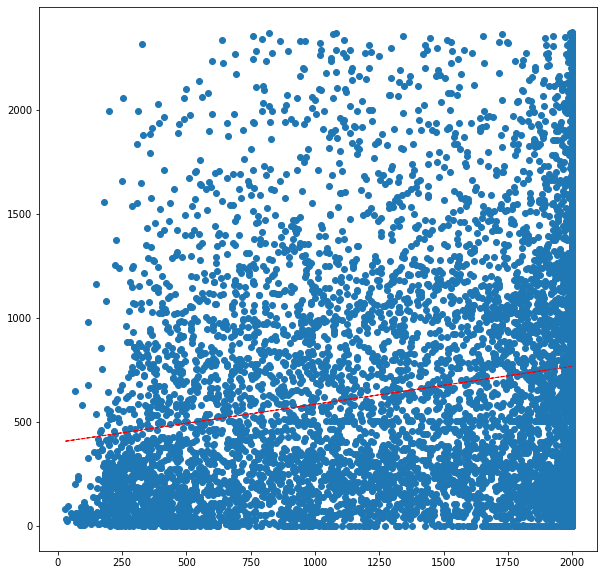

Dew point temperature(°C)


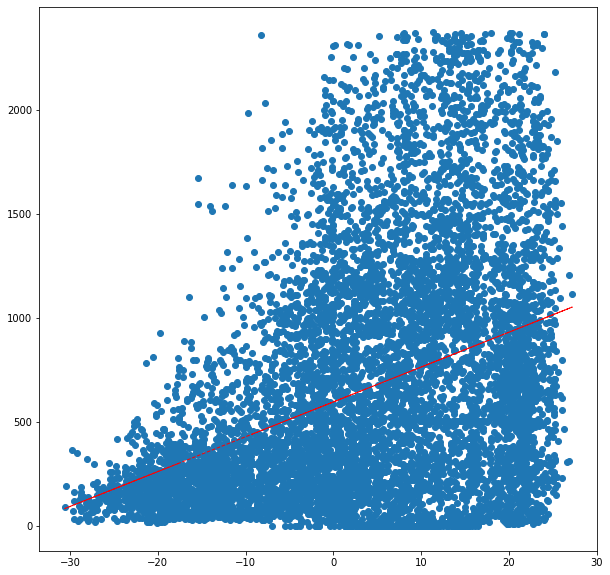

Solar Radiation (MJ/m2)


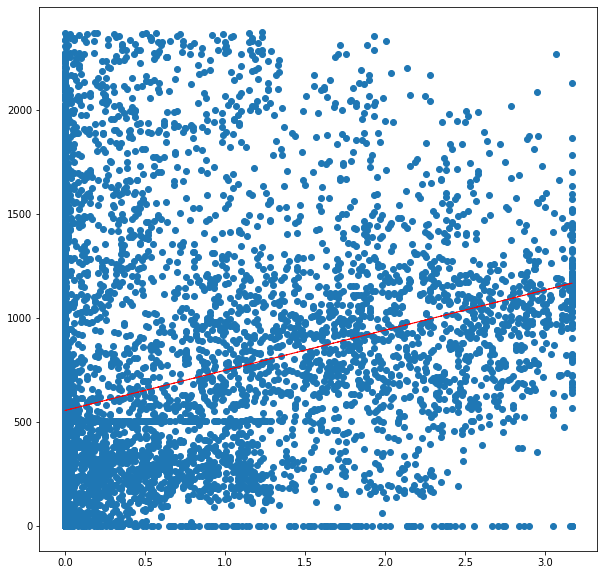

Rainfall(mm)


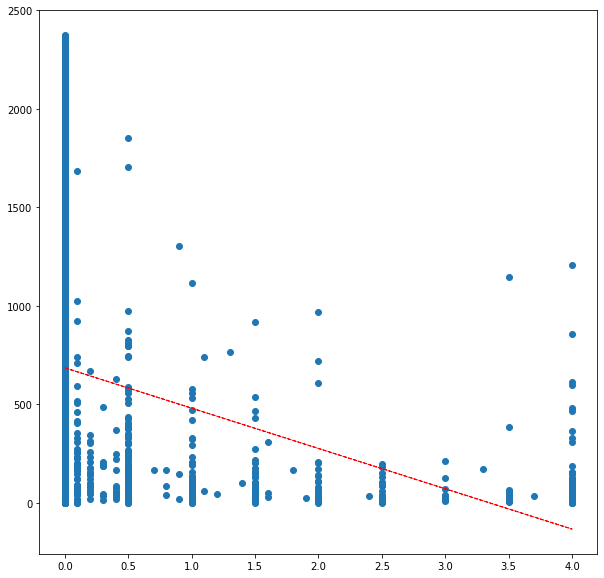

Snowfall (cm)


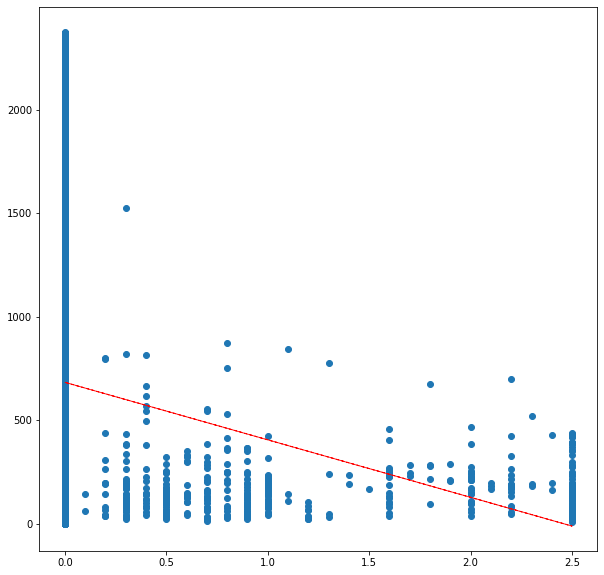

In [ ]:
for i in numeric_features:
  print(i)
  plt.figure(figsize=(10,10))
  plt.scatter(df[i],df["Rented Bike Count"])
  z = np.polyfit(df[i],df['Rented Bike Count'],1)
  y_hat = np.poly1d(z)(df[i])
  plt.plot(df[i], y_hat, "r--", lw=1)


  plt.gca()
  plt.show()

<AxesSubplot:>

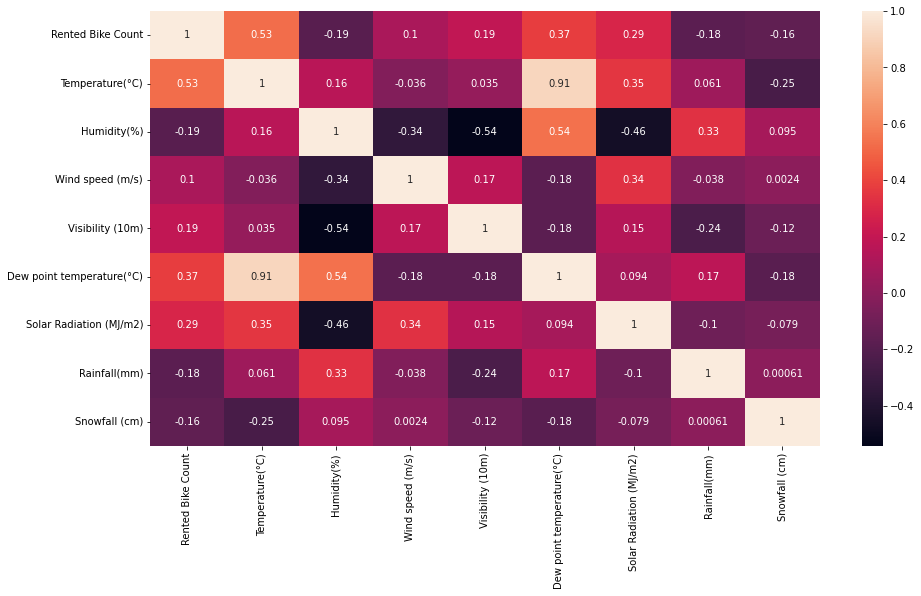

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)


In [ ]:
df=df.drop(["Dew point temperature(°C)"],axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Date','Rented Bike Count']]])

,variables,VIF
0,Temperature(°C),3.220846
1,Humidity(%),5.031025
2,Wind speed (m/s),4.169738
3,Visibility (10m),4.541743
4,Solar Radiation (MJ/m2),2.262131
5,Rainfall(mm),1.166574
6,Snowfall (cm),1.144690


In [ ]:
numerical_features = ['Temperature(°C)','Humidity(%)','Wind speed (m/s)',"Visibility (10m)","Solar Radiation (MJ/m2)","Rainfall(mm)","Snowfall (cm)"]

In [ ]:
categorical_features = df.describe(include=['object','category']).columns

In [ ]:
df_pr = df.copy()

In [ ]:
# One hot encoding
df_pr = pd.get_dummies(df_pr, columns=["Seasons","Hour", "Holiday","Functioning Day"])

In [ ]:
df_pr.head()

,Date,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,...,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,2017-01-12,254.0,-5.2,37,2.2,2000,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,1,0,1
1,2017-01-12,204.0,-5.5,38,0.8,2000,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,1,0,1
2,2017-01-12,173.0,-6.0,39,1.0,2000,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,1,0,1
3,2017-01-12,107.0,-6.2,40,0.9,2000,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,1,0,1
4,2017-01-12,78.0,-6.0,36,2.3,2000,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,1,0,1


In [ ]:
features = numerical_features.copy()
features.extend(["Seasons_Autumn","Hour_0",'Hour_1','Hour_2','Hour_3','Hour_4','Hour_5','Hour_9','Hour_10','Hour_11','Hour_12','Hour_13','Hour_14','Hour_15','Hour_16','Hour_17','Hour_18','Hour_19','Hour_21','Hour_22','Hour_23',"Seasons_Spring","Seasons_Summer","Seasons_Winter","Holiday_Holiday","Holiday_No Holiday",'Functioning Day_No','Functioning Day_Yes'])

In [ ]:
features

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons_Autumn',
 'Hour_0',
 'Hour_1',
 'Hour_2',
 'Hour_3',
 'Hour_4',
 'Hour_5',
 'Hour_9',
 'Hour_10',
 'Hour_11',
 'Hour_12',
 'Hour_13',
 'Hour_14',
 'Hour_15',
 'Hour_16',
 'Hour_17',
 'Hour_18',
 'Hour_19',
 'Hour_21',
 'Hour_22',
 'Hour_23',
 'Seasons_Spring',
 'Seasons_Summer',
 'Seasons_Winter',
 'Holiday_Holiday',
 'Holiday_No Holiday',
 'Functioning Day_No',
 'Functioning Day_Yes']

In [ ]:
from scipy.stats import zscore
#Train test split
X = df_pr[features].apply(zscore)

In [ ]:
y = np.sqrt(df_pr['Rented Bike Count'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(7008, 35)
(1752, 35)


In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

0.7112523257979293

In [ ]:
importance = np.abs(reg.coef_)
feature = features
indices = np.argsort(importance[0:6])
indices = indices[::-1]

In [ ]:
reg.intercept_

22.943692276117844

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
y_pred

array([15.09699733, 24.33631618, 19.36745937, ..., 20.51086147,
       32.1396609 , 25.8292361 ])

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 40.84964292699492
RMSE : 6.391372538586287


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score((y_test), (y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.7095557188551512
Adjusted R2 :  0.7036317387618705


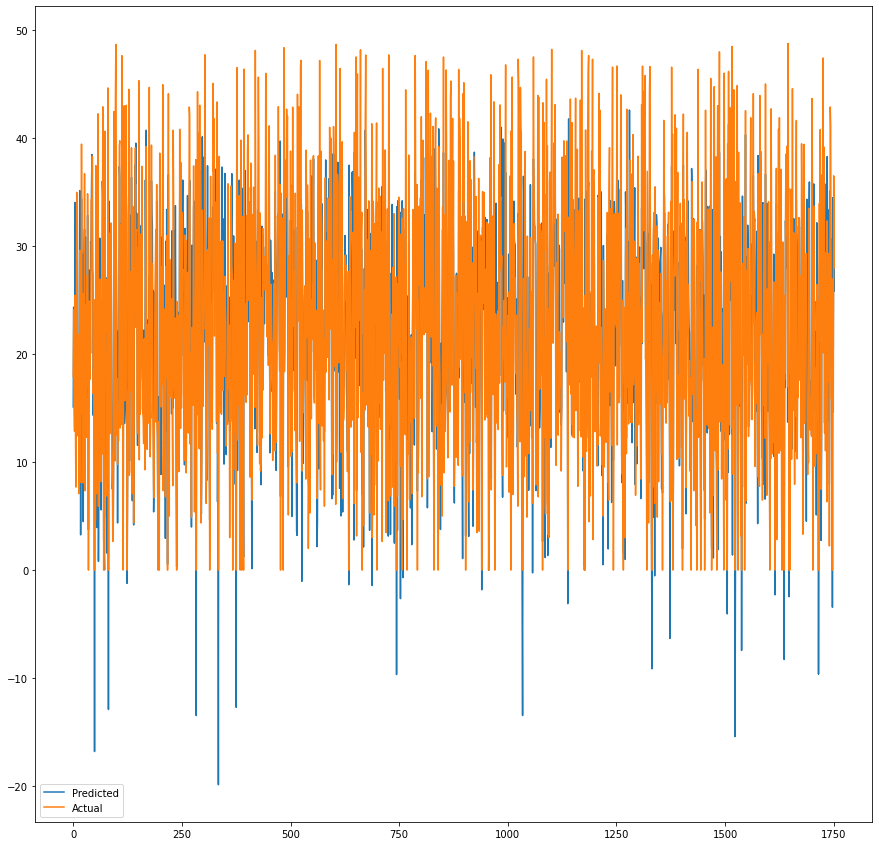

In [ ]:
plt.figure(figsize=(15,15))
plt.plot((y_pred))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

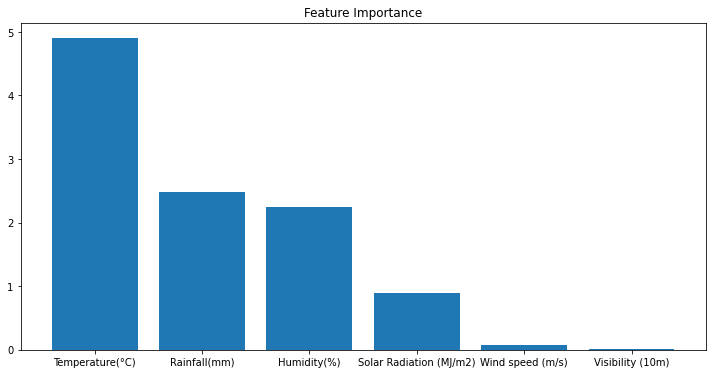

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(2,1,2)
plt.bar(range(len(indices)),importance[indices])
plt.xticks(range(len(indices)), [feature[i] for i in indices])
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
lasso.score(X_train, y_train)

0.7112522778325723

In [ ]:
lasso.coef_

array([ 4.90232316, -2.25303196, -0.06840869,  0.00629187,  0.89713791,
       -2.48483337, -0.03633576,  2.36196085, -0.46705342, -0.88226962,
       -1.46385749, -1.90998412, -2.41058058, -2.3532202 , -0.18741426,
       -1.07995246, -1.08546997, -0.8739138 , -0.94569302, -0.91425833,
       -0.66003957, -0.32788798,  0.34593321,  0.26246777,  0.4928314 ,
        0.76488886,  0.58831839, -0.14637799,  1.05771848,  0.93606632,
       -1.00466167, -0.54472886,  0.        , -5.03436656,  0.        ])

In [ ]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.243e+04, tolerance: 7.873e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.779e+04, tolerance: 7.842e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.137e+04, tolerance: 7.866e+01

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0014}

Using  {'alpha': 0.0014}  the negative mean squared error is:  -40.77179013523025


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

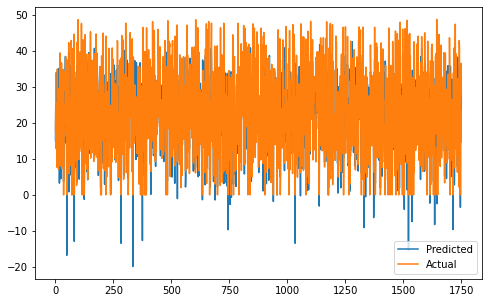

In [ ]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_lasso))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error((y_test), (y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 40.850403842703486
RMSE : 6.391432065093353
R2 : 0.7095503086826223
Adjusted R2 :  0.7036262182419998


In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 10}

Using  {'alpha': 10}  the negative mean squared error is:  -40.78397404268441


In [ ]:
y_pred_ridge = ridge_regressor.predict(X_test)

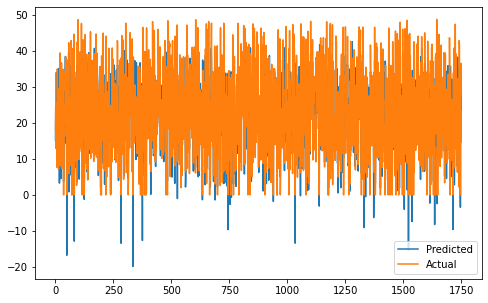

In [ ]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error((y_test), (y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 40.85454872093081
RMSE : 6.391756309570227
R2 : 0.7095208382615632
Adjusted R2 :  0.7035961467342641


In [ ]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
elasticnet.score(X_train, y_train)

0.7072336424140409

In [ ]:
y_pred_en = elasticnet.predict(X_test)


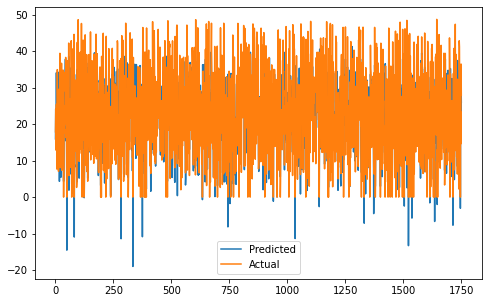

In [ ]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error((y_test), (y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 41.46176095091127
RMSE : 6.439080753563451
R2 : 0.705203509957024
Adjusted R2 :  0.699190761034236


In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.347e+04, tolerance: 7.873e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.160e+04, tolerance: 7.842e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.414e+04, tolerance: 7.866e+01

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

**conclusion**

**linear regression**

Temprature is most important feature in deciding rented bike count.


MSE : 40.84964292699492

RMSE : 6.391372538586287

R2 : 0.7095557188551512

Adjusted R2 :  0.7036317387618705

**lasso regression**

MSE : 40.850403842703486

RMSE : 6.391432065093353

R2 : 0.7095503086826223

Adjusted R2 :  0.7036262182419998

**ridge regreesion**

MSE : 40.85454872093081

RMSE : 6.391756309570227

R2 : 0.7095208382615632

Adjusted R2 :  0.7035961467342641

**elastic net**

MSE : 41.46176095091127

RMSE : 6.439080753563451

R2 : 0.705203509957024

Adjusted R2 :  0.699190761034236
